Matplotlib is building the font cache; this may take a moment.


adaBoost Evaluation
Accuracy: 0.956140350877193
Precision: 0.9583333333333334
Recall: 0.971830985915493
F1-Score: 0.965034965034965

 Confusion Matrix =:
, confusuin_matrix(y_test,y_pred)

 Classification Report =:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Singl tree Accuracy: 0.8947368421052632
AdaBoosting Accuracy  : 0.956140350877193


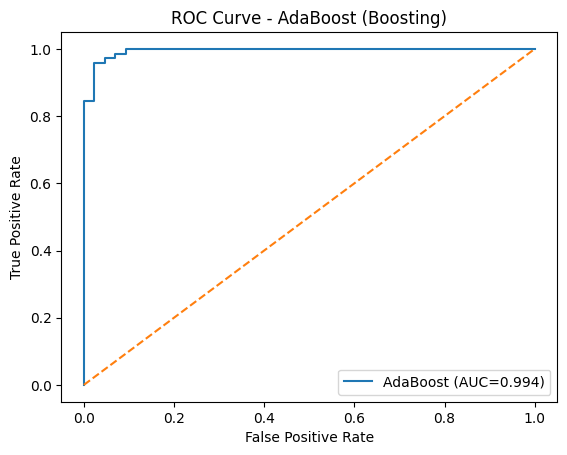

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, roc_auc_score
)
import matplotlib.pyplot as plt

#load dataset
x,y=load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

base_model=DecisionTreeClassifier(max_depth=1,random_state=42)
boost_model=AdaBoostClassifier(
    estimator=base_model,
    n_estimators=50,
    learning_rate=0.1,
    random_state=42
)

boost_model.fit(X_train,y_train)

y_pred=boost_model.predict(X_test)
y_prob=boost_model.predict_proba(X_test)[:,1]

print("adaBoost Evaluation")
print("Accuracy:",accuracy_score(y_test,y_pred))  
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1-Score:",f1_score(y_test,y_pred))

print("\n Confusion Matrix =:\n, confusuin_matrix(y_test,y_pred)")
print("\n Classification Report =:\n",classification_report(y_test,y_pred))

single_model=DecisionTreeClassifier(max_depth=1,random_state=42)
single_model.fit(X_train,y_train)
single_pred=single_model.predict(X_test)

print("\nSingl tree Accuracy:", accuracy_score(y_test,single_pred))
print("AdaBoosting Accuracy  :", accuracy_score(y_test,y_pred))


fpr,tpr,_=roc_curve(y_test,y_prob)
auc=roc_auc_score(y_test,y_prob)

plt.figure()
plt.plot(fpr,tpr, label=f"AdaBoost (AUC={auc:.3f})")
plt.plot([0,1],[0,1],linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - AdaBoost (Boosting)")
plt.legend()
plt.legend()
plt.show()